<h1><b><u> Titanic data exploration </u></b></h1>
Submitted by: <br>
Amir Motiei


Remark: If we doing esc+H we get all shortcuts

# Remind: About the prompt

from the windows comand prpmpt:
    "pip- V" take us to the python software, gives all the shortcut
    "pip -- version" checks which version of the propmpt
    "-m pip install --upgrade pip" install the latest version pf the pip (18.1 etc.)
    "pip list" will give all the installations of python in the computer
    "pip search numpy" searching all the files which relates numpy and fives as a result the version of the packages, for
example "numpy 1.15.4"
    "pip install numpy" install the package or in a similar way "uninstall" we need to install "matplotlib", "numpy" for the
start
    making sure that the installation work

    type: A. "python"
    "import python as np". does not say anything means its succesfully installed

In a similar way "import matplotlib.pyplot as plt" exite live the command prmpt window

We can even define table of contentes... the notebook of some of the cases may be a lot code rows.

<h2><b>TOC</b></h2>

-[OverView](#OverView) <br>
-[Statistics](#Statistics)

<h3><u><b>OverView</b></u></h3>

Now we are ready to upload the file. The package for datascience is: pandas (in addition to numpe etc).
We will define a model which predicts the survivors.

In [ ]:
import pandas as pd #knows how tho work with tables (csv files)
import numpy as np
import random as rnd #this is a rand function

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#We would like to upload the data files: train data and test data
train_df = pd.read_csv(r'c:\Users\amirm\Downloads\train (3).csv')
test_df = pd.read_csv(r'c:\Users\amirm\Downloads\test.csv')




Some output of the data...

In [ ]:
#if we would like to see the initial users in the table
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#the last five
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Second lesson

We saw how to upload the file

In [ ]:
#We would like to see the matrix size of the dataset
train_df.shape

(891, 12)

In [ ]:
#what about the test data
test_df.shape

(418, 11)

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that in the test data the variable 'survived' does not exist which is as we expected. The other variables are exacly the same

Notice, that if the train data (without survived column) is in $\mathbb{R}^d$, then also the test data needs to be in the same column dimension.

# Initial questions: <br>
- How many nulls we have in each column? <br>
- Is there one column more important than another? <br>
- Is there a corulation (קשר) between paramaters? <br>
- How to convert the string data to numerical data? <br>
- Maybe we would like to normalize the data or change to catagorial variables? <br>
- Are there any duplicated rows?

REMARK: The given data partition is 1:3 (test data) and 2:3 (train data), which is good for us!

In [ ]:
# Lets see the different cloumns value
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
check_dupilcates = train_df.copy()
check_dupilcates.drop_duplicates()
check_dupilcates.shape

(891, 12)

In [ ]:
# How many nulls and which parameters we have
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# How many nulls and which parameters we have in the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Conclusion: We will have fill the age maybe by the average, media, etc. There's a good chance that the cabin variable will be dropped, since most of the column is NULL, or maybe we could change it to catagorial variable.

In [ ]:
# We can look on a one column or more
train_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
#the first column is column zero, so the second column is 'pclass'
train_df[train_df.columns[2]]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
train_df[['Survived', 'Pclass']]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [ ]:
train_df.iloc[:,3] # iloc >> locate by column number

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# Mayne to find a specific property?
train_df.loc[train_df['Embarked']=='Q'] # loc >> locate by column name

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [ ]:
female_data = train_df.loc[train_df['Sex']=='female']
female_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# We can even search values in a given dataframe in all columns
search_val = train_df[train_df.isin(['male','330877']).any(axis=1)]
search_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# find a specific value or person
train_df.where(train_df=='Montvila, Rev. Juozas')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,"Montvila, Rev. Juozas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# If we would like the name in the first raw
train_df["Name"][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [ ]:
train_df.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [ ]:
# We can output a submatrix of cloumns and rows
train_df.iloc[9:25,2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


In [ ]:
train_df.iloc[[0,1]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
age_sex = train_df[['Age', 'Sex']]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [ ]:
type(age_sex)

pandas.core.frame.DataFrame

In [ ]:
above_35 = age_sex[train_df['Age']>35]
above_35.head()

,Age,Sex
1,38.0,female
6,54.0,male
11,58.0,female
13,39.0,male
15,55.0,female


In [ ]:
# Notice that if I will write as below the result is an indication
indicator = above_35['Age']>50
indicator

1      False
6       True
11      True
13     False
15      True
       ...  
865    False
871    False
873    False
879     True
885    False
Name: Age, Length: 217, dtype: bool

In [ ]:
class_23 = train_df[(train_df['Pclass']==2) | (train_df['Pclass']==3)]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
age_range=max(train_df['Age'])-min(train_df['Age'])
age_range

79.58

REMARK: If we would like to normalize the parameter: $\frac{Age-Age_{min}}{Age_{range}}$

In [ ]:
# We can print each of the passengers by
number_of_rows = len(train_df['Name'])
for i in range (number_of_rows - 885):
    print('Passenger number:', i, 'and the name is: ', train_df['Name'][i])


Passenger number: 0 and the name is:  Braund, Mr. Owen Harris
Passenger number: 1 and the name is:  Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Passenger number: 2 and the name is:  Heikkinen, Miss. Laina
Passenger number: 3 and the name is:  Futrelle, Mrs. Jacques Heath (Lily May Peel)
Passenger number: 4 and the name is:  Allen, Mr. William Henry
Passenger number: 5 and the name is:  Moran, Mr. James


In [ ]:
# We get the prices from low to high in the rows
train_df.sort_values(by=['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


<h3><u><b>Statistics</b></u></h3>


We would like some general information on the data... we use the describe function

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# We see that we have a passenger in the image of 80, the question is how many?
train_df.loc[train_df['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [ ]:
train_df.loc[train_df['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
train_df.loc[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
# what about the string variables
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Lesson number 3

Until now we saw basic statistics, but we would like to generalize it, maybe byes formula (נוסחת בייס)?
As example we know that females have batter chance to survive, even though most of the passengers are men.

But maybe if we'll take another variable, is there a chance that the chance for survive will increase for men?
As example rich men, or old men, kids. In a similar way $P(Survived|Female)=?$ (נוסחת בייס, הסתברות מותנית) ... lets start...

In [ ]:
# What is the connection between women and the chance to survive?
train_df[['Sex', 'Survived']].groupby(["Sex"], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


We can deduce that $P(1|Female)=0.742$ and $P(1|Male)=0.188$, its easy to find $P(0|Female)=1-P(1|Female)$ and so on

In [ ]:
train_df[['Age', 'Survived']].groupby(["Age"], as_index=False).mean()

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


Notice, that in the tble above the age variale is a float with many frequencis, i.e., it cannot lead us to statistics, since if we have one person in the age of the 25 surviverd, that the machine will predict any person in the age of 25 as survived,
which is an error in the prediction.

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As a result we will explore the categorial variables

In [ ]:
train_df[['Pclass', 'Survived']].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can deduce that if you stay in the firt class u have a better chance to survive.
We also believe that the variables 'Fare' and 'Pclass' are have correlation.

In [ ]:
train_df[['Embarked', 'Survived']].groupby(["Embarked"], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Notice we can explore a given Pclass in the data:

In [ ]:
train_df[train_df["Pclass"]==1].select_dtypes(include='number').mean()

PassengerId    461.597222
Survived         0.629630
Pclass           1.000000
Age             38.233441
SibSp            0.416667
Parch            0.356481
Fare            84.154687
dtype: float64

# Lesson number 4
First assumption is that there is a correlation between "Pclass" and "Fare".
Also we will check the colleration between "Embarked" and "Fare".

In [ ]:
train_df[['Pclass', 'Fare']].groupby(["Pclass"], as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [ ]:
train_df[['Embarked', 'Fare']].groupby(["Embarked"], as_index=False).mean()

,Embarked,Fare
0,C,59.954144
1,Q,13.276030
2,S,27.079812


By "Fare"\"Embarked" function we can assume that <br>:
A. "Embarked" C ---> Rich people <br>
B. C in the first station in the cruze

In [ ]:
#Check the connection between survive rare and Sibsp
train_df[['Survived', 'SibSp']].groupby(["SibSp"], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


So, we have a few parameters which seems to be important to be include in our model, as less as the distribution (התפלגות) is uniform (אחידה) the more the variable is important. Now we ready to plot some histograms.

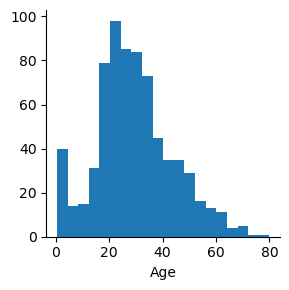

In [ ]:
Age_distribution = sns.FacetGrid(train_df)
Age_distribution.map(plt.hist, "Age", bins=20)

<Axes: xlabel='Age', ylabel='Density'>

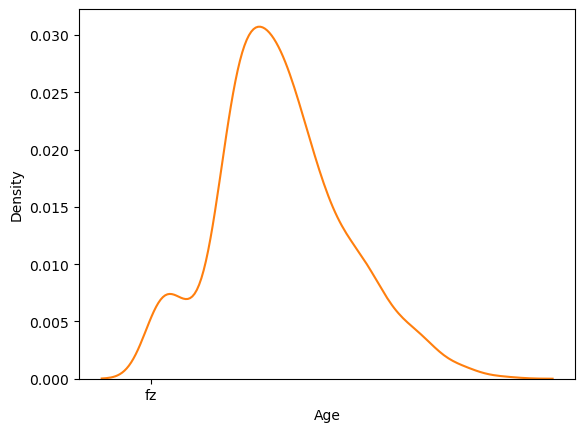

In [ ]:
# Lets approximate it as normal distribution. Notice that fz is z~(0,1)
plt.hist(data=train_df["Age"], x='fz', bins=np.arange(0,1,80), densitiy=True)
sns.kdeplot(train_df["Age"])

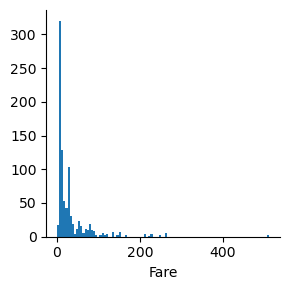

In [ ]:
Fare_distribution = sns.FacetGrid(train_df)
Fare_distribution.map(plt.hist, "Fare", bins=100)

#If we would like a better closeup we can define the range... see the manual of hist (מדריך להיסטוגרמה)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

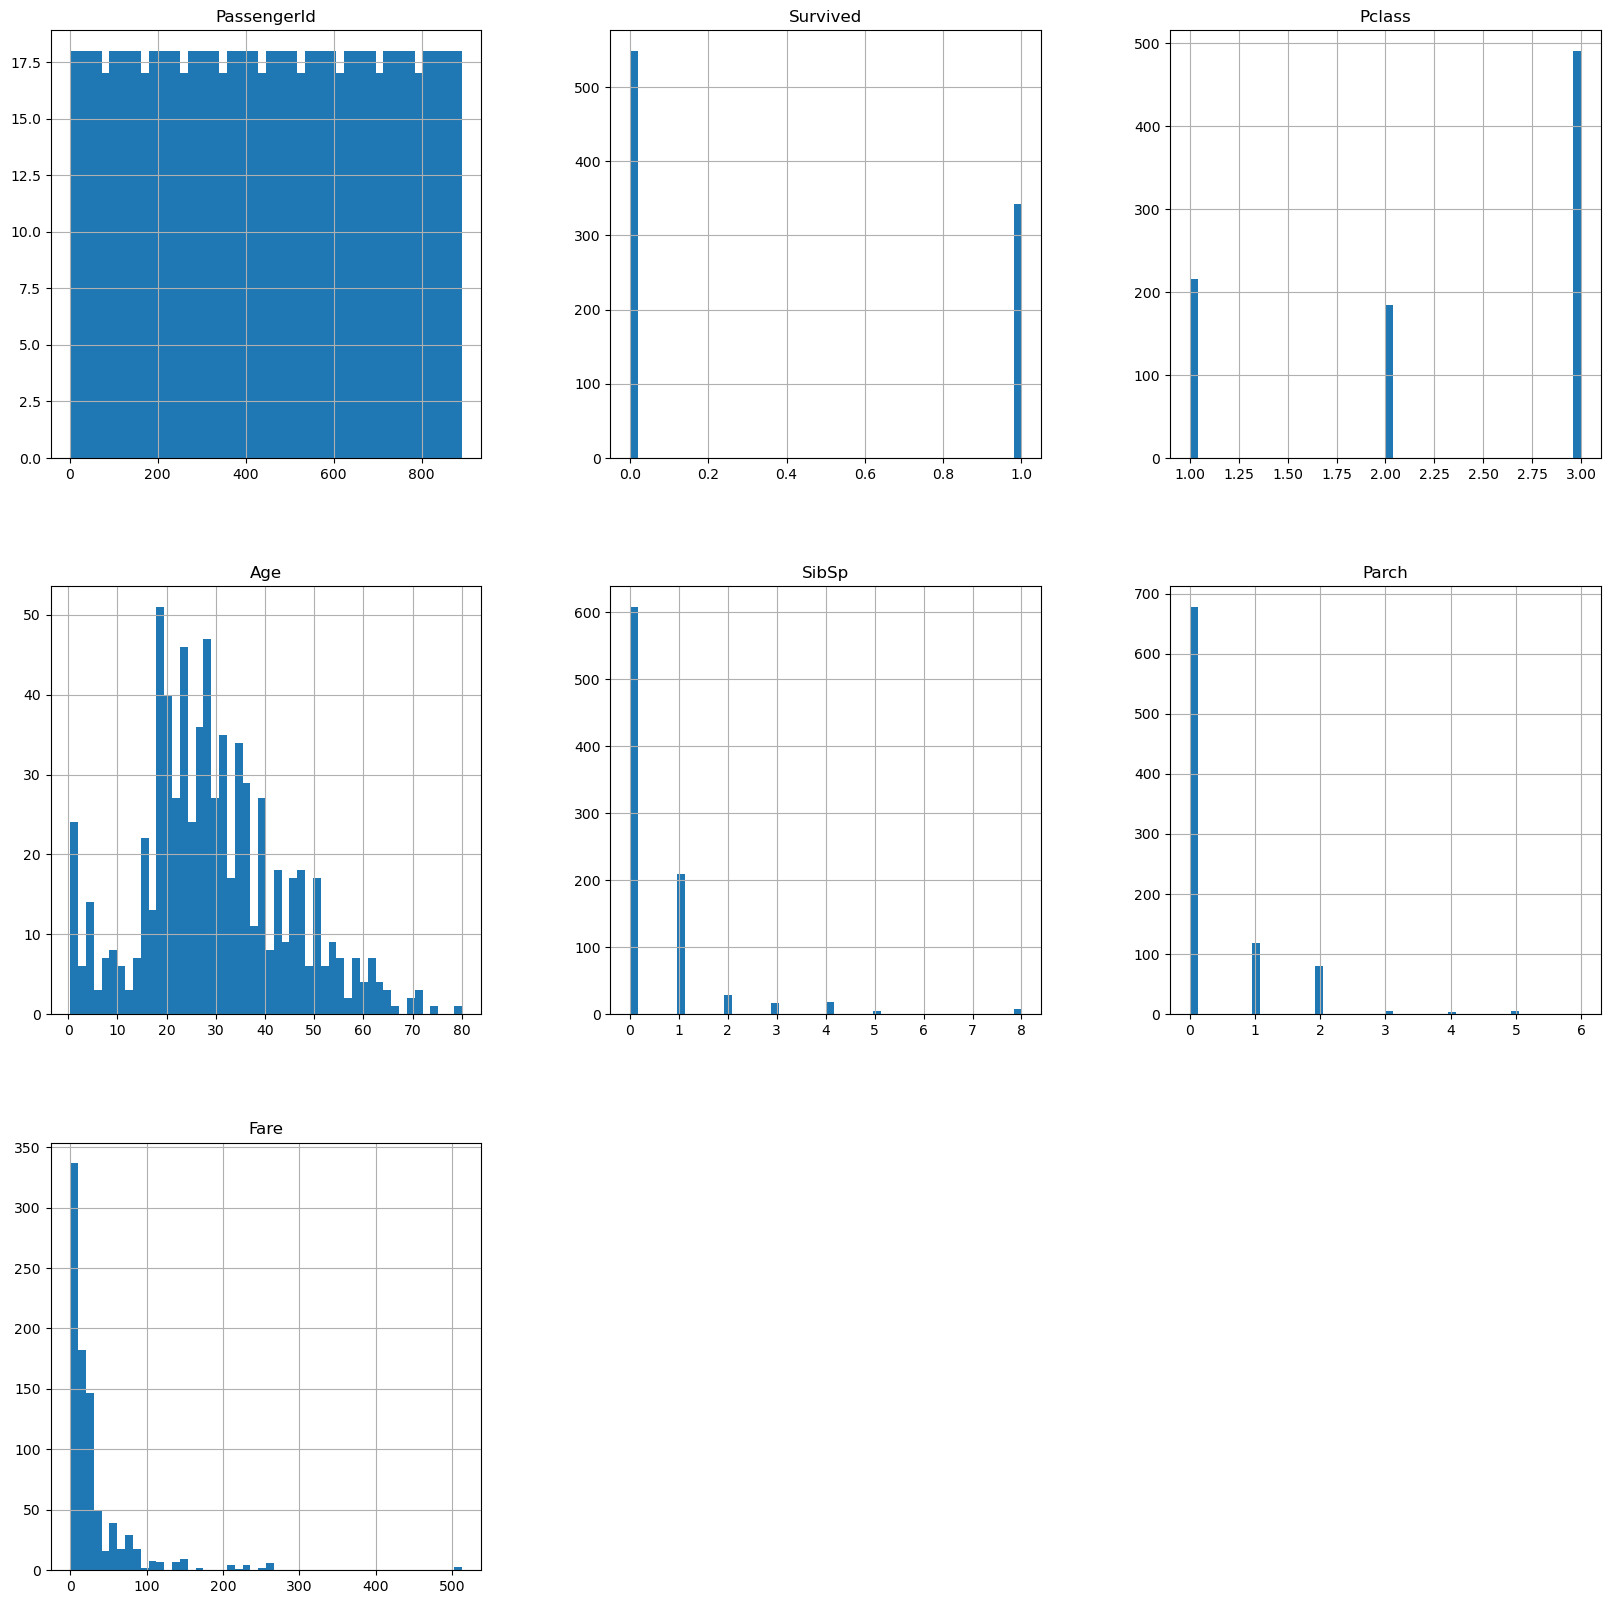

In [ ]:
# The following command will plot all numerical variables histogramas
train_df.hist(bins=50, figsize=(20,20))

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we would like to compare 2 histograms of Survived/No Survived for a given variable.

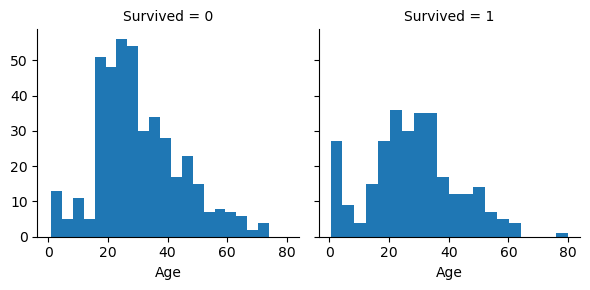

In [ ]:
Age_distribution = sns.FacetGrid(train_df, col="Survived")
Age_distribution.map(plt.hist, "Age", bins=20)

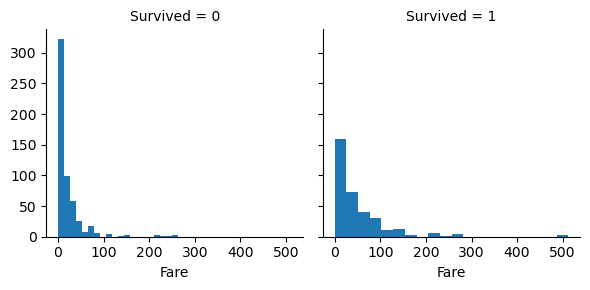

In [ ]:
Fare_distribution = sns.FacetGrid(train_df, col="Survived")
Fare_distribution.map(plt.hist, "Fare", bins=20)

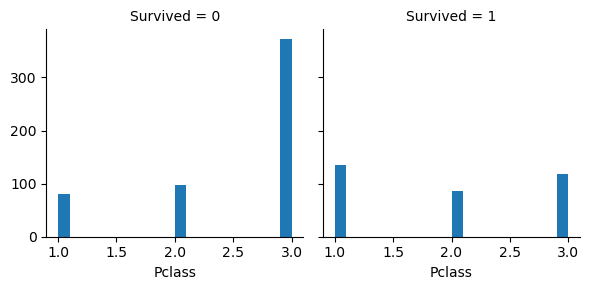

In [ ]:
Pclass_distribution = sns.FacetGrid(train_df, col="Survived")
Pclass_distribution.map(plt.hist, "Pclass", bins=20)

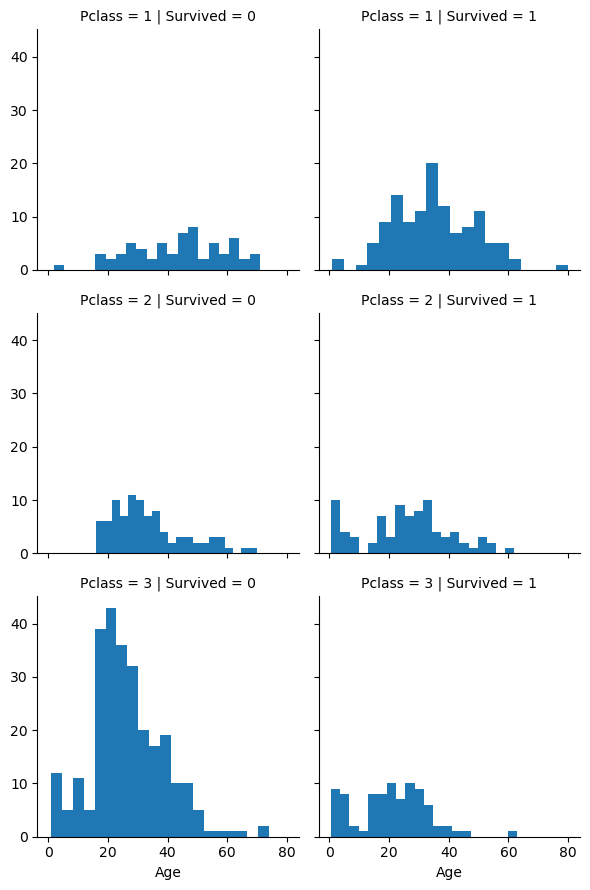

In [ ]:
# If its not giving me enough details
Age_distribution = sns.FacetGrid(train_df, col="Survived", row="Pclass")
Age_distribution.map(plt.hist, "Age", bins=20)

If the results are not good enough we will add more dimensions to the probabilty distribution as above.

# Lesson Number 5
Quiz scheduzlized to the 22/09/24, at the same hour of the lesson

Notice the age column, was predictable when the age is $<5$, otherwise was complicated. So the question is, If we add another parameter to the age can it give a better prediction?

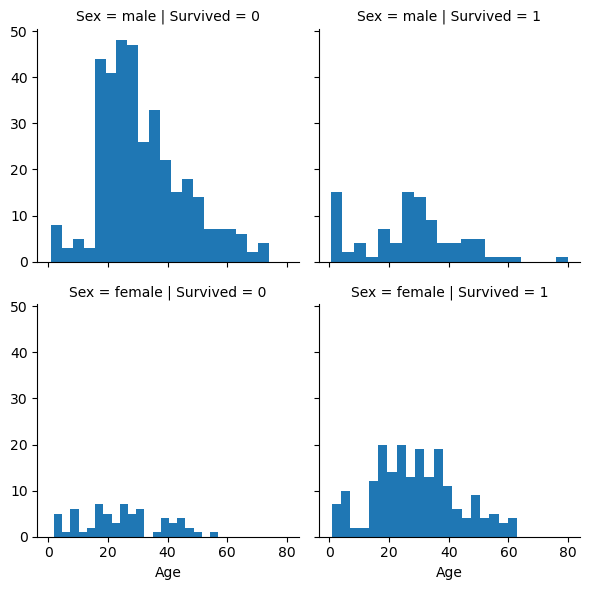

In [ ]:
g = sns.FacetGrid(train_df, col="Survived", row="Sex")
g.map(plt.hist, "Age", bins=20)

c:\Users\amirm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\amirm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\amirm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\amirm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\amirm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarnin

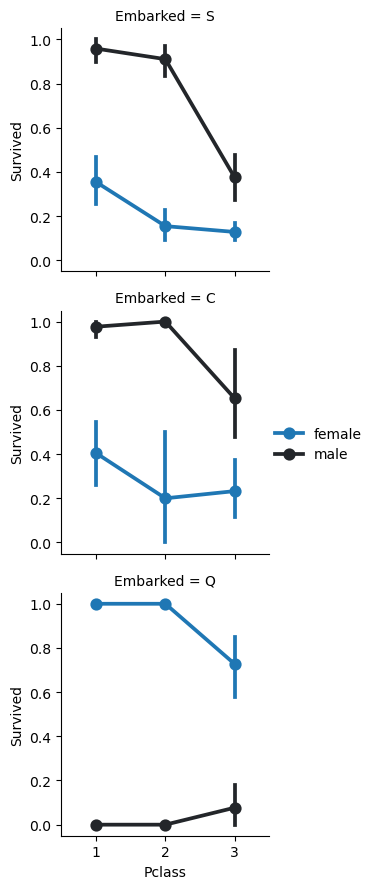

In [ ]:
# In a similar way, lets explore the Embarked value. Notice that the Embarked is categorial.
grid = sns.FacetGrid(train_df, row="Embarked")
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex') # This is not an histogram
grid.add_legend()

The graphs above are respected to the "Embarked".
Suprisingly, If Embarked=C, then P(Survived|Men)>P(Survived|Female).

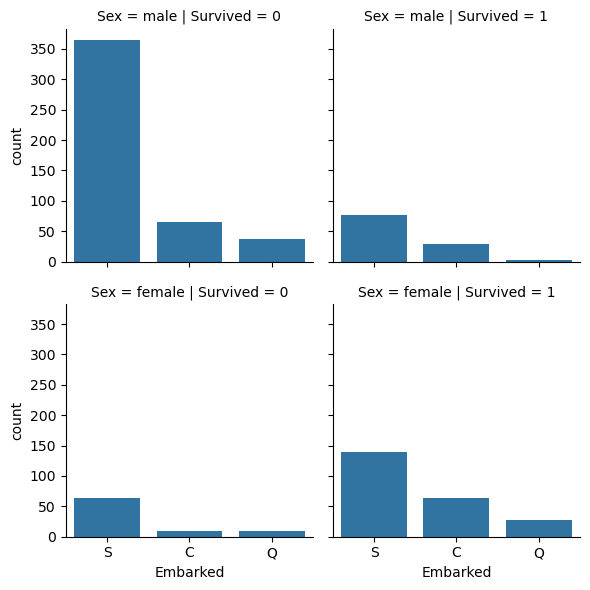

In [ ]:
# In a similar way we can plot an hostogram
Embarked_distribution = sns.FacetGrid(train_df, col = 'Survived', row='Sex')
Embarked_distribution.map(sns.countplot, 'Embarked', order=['S', 'C', 'Q'])

# Summary before starting to process the data

- The variable "Sex" is very important for our model, womens better chances to survive.
- Also the "Pclass" (class), especially we can see the connection between class 1 and survive.
- Although "Embarked" does not look like an inportant variable, when we explore it as two dimensional variable, then it can explain the surviving chances.
- There is a connection between thr variable "Fare" and "Pclass", we believe that $Cov(Fare,Pclass)\neq 0$, they are coordinated (there is a correlation (קשר/תלות) between them).
since $|"Fare"|<891$, then maybe we prefer "Pclass"?

# Future Work
- We need to vhange all continuos (float) variable to $< \mathbb(N)$ (as the cardinality)ץ
- Passenger ID, seems to be unimporatant column, we will drop it,
- We will try to find a connection between variables, which will reduce the dimension. As example we will define a linear function $f('SibSp','Parch')$.
- Cabin (תא), the number of NULL $>50%$ in the train data and in the test data, in our naive approach we will drop this variable.
- REMEMBER: changing the train data and test data needs to be done parallel., i.e (כלומר), the column dimension and the variable and the type needs to be the same.

In [ ]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We are wondering where there any roayal family from second or more on the Titanic

In [ ]:
Lords = train_df.loc[train_df['Name']=='Lord']
Lords

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Notice, Since the variable 'Name' is a string, the command checks if exists a 'Lord', but if its written a "Miama Lord" , will nor recognize it. We will sure later on, how to extract this Title.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# We decided to drop 'Cabin' and 'PassengerID'
train_df = train_df.drop(["PassengerId", "Cabin"], axis=1)

In [ ]:
# Lets check which columns are valid now
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'], dtype=object)

In [ ]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
# We also need to change the dimension in the test data
test_df = test_df.drop(["PassengerId", "Cabin"], axis=1)

In [ ]:
# Lets check which columns are valid now
test_df.columns.values

array(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'], dtype=object)

To make our life easier and that the process of changing the data will be paralleled in the train data and the test data, we will define a tensure.

In [ ]:
combine = [train_df,test_df]
print('This is the dim of the train data', combine[0].shape)
print('This is the dim of the test data', combine[1].shape)

This is the dim of the train data (891, 10)
This is the dim of the test data (418, 9)


In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Lets discuss about the 'Name' column.
We would like to extract the title of each person... we need to cut the string. the sesired string is between thr first blank and the point. Obviously , the key is to locate the string before the point.




In [ ]:
for dataset in combine: # this loop is only twice
    dataset["Title"] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

# If we have space between Z to a then in have to add space to the 'Title':
# dataset["Title"] = dataset.Name.str.extract('([A-Z a-z]+)\.', expand=False)
# -->
# drs = train_df.loc[train_df['Title'] == ' Dr'].


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\amirm\AppData\Local\Temp\ipykernel_11484\3056920424.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset["Title"] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)


Notice the command above have more features...check it out

In [ ]:
train_df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [ ]:
# Lets check if there are any doctors?
drs = train_df.loc[train_df['Title'] == 'Dr']
drs

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
245,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,Dr
317,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,Dr
398,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,Dr
632,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,Dr
660,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,Dr
766,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C,Dr
796,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr


We are intrested to know what are the Titles options.

In [ ]:
titles = []
for dataset in combine:
    for title in dataset['Title']:
        if title not in titles:
            titles.append(title)
titles

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [ ]:
# sort values by title
train_df.sort_values(by="Title")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,Capt
694,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,S,Col
647,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,C,Col
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,S,Countess
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,Don
...,...,...,...,...,...,...,...,...,...,...,...
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,S,Rev
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,S,Rev
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,Q,Rev
848,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,S,Rev


The command above does not give us any bettwe insights.

In [ ]:
# Lets find all the different titles, one from each
pd.unique(train_df['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# In a similar way lets see in the test
pd.unique(test_df['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [ ]:
pd.unique(train_df.Title) #...its the same

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
train_df[['Survived','Title']].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [ ]:
# But how much from each title?
count = train_df['Title'].value_counts()
count

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
count_test = test_df['Title'].value_counts()
count_test


Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [ ]:
# Lets compare for each title the sum of 'Survived' VS 'Not Survvied'
pd.crosstab(train_df["Title"], train_df["Survived"])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


We would like to a make the 'Title' column tending to uniform disrtibuition, obviously, $\{Mens, Womens,\}$... so lets start to combine some of the categories to one category.

In [ ]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Ms", "Mme"],"Miss")
    dataset["Title"] = dataset["Title"].replace(["Lady", "Col", "Countess", "Major", "Capt", "Don", "Jonkheer", "Dona"],"Rare")
    dataset["Title"] = dataset["Title"].replace("Sir","Mr")


In [ ]:
pd.crosstab(train_df["Title"], train_df["Survived"])

Survived,0,1
Title,,
Dr,4,3
Master,17,23
Miss,55,131
Mr,436,82
Mrs,26,99
Rare,5,4
Rev,6,0


# About Rev
Our psylogical assumption that Rev=priest, the chances to survive are 0, since the support the ones in trouble (who going to die).


# Lesson Number 6

In [ ]:
pd.unique(train_df["Title"])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Rev', 'Dr'], dtype=object)

In [ ]:
pd.unique(test_df["Title"])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Rev', 'Dr'], dtype=object)

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


- After we extracted the Titles from the Names we need to decide if the name is relevent? As always it depends on the programmer. In our naive approach we will drop the 'Name' column.
- If the data may contain errors, we can cross the 'Sex' with the 'Name' to make sure the gender is the right one.
- In addition, the Titles in the test data need to be cointained in the Titles in the train data.

In [ ]:
combine[0]=combine[0].drop(["Name"], axis=1)


In [ ]:
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [ ]:
combine[1]=combine[1].drop(["Name"], axis=1)


In [ ]:
combine[1].head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,Q,Mr
1,3,female,47.0,1,0,363272,7.0000,S,Mrs
2,2,male,62.0,0,0,240276,9.6875,Q,Mr
3,3,male,27.0,0,0,315154,8.6625,S,Mr
4,3,female,22.0,1,1,3101298,12.2875,S,Mrs


In [ ]:
print('This is the dim of the train data', combine[0].shape)
print('This is the dim of the test data', combine[1].shape)

This is the dim of the train data (891, 10)
This is the dim of the test data (418, 9)


In [ ]:
combine[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
combine[0].describe(include="O")

,Sex,Ticket,Embarked,Title
count,891,891,889,891
unique,2,681,3,7
top,male,347082,S,Mr
freq,577,7,644,518


After a short discussion we decided to drop the column 'Ticket'...

In [ ]:
combine[0] = combine[0].drop(["Ticket"], axis=1)
combine[1] = combine[1].drop(["Ticket"], axis=1)


In [ ]:
print('This is the dim of the train data', combine[0].shape)
print('This is the dim of the test data', combine[1].shape)

This is the dim of the train data (891, 9)
This is the dim of the test data (418, 8)


We will change the categorial strings to nummerical categorial numbers.